<a href="https://colab.research.google.com/github/Etnawu/Exploratory-Data-Analysis-List-of-World-Cities-by-Population-Density/blob/main/Exploratory_Data_Analysis_List_of_World_Cities_by_Population_Density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exploratory Data Analysis: List of World Cities by Population Density
>List of Metropolitan Areas by Population Density Top 50 Cities 

This is a list of cities worldwide by population density. The population, population density and land area for the cities listed are based on the entire city proper, the defined boundary or border of a city or the city limits of the city. The population density of the cities listed is based on the average number of people living per square kilometer or per square mile. This list does not refer to the population, population density or land area of the greater metropolitan area or urban area, nor particular districts in any of the cities listed.

License: CC0: Public Domain

Expected update frequency for dataset: :Annually (notebook will not be updated)

Kaggle: https://www.kaggle.com/datasets/rajkumarpandey02/list-of-world-cities-by-population-density

##Importing dataset from kaggle

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv ("/content/world_cities_by_population density.csv")

In [ ]:
df.head()

,Unnamed: 0,City,Population,Area (km²),Area (mi²),Density (/km²),Density (/mi²),Country
0,0,Malé,"153,904[1]",1.956[1],0.755,78683,203846.0,Maldives
1,1,Manila,"1,660,714[2]",38.55[3],14.88,43079,111576.0,Philippines
2,2,Bogor,"866,034[4]",21.56[5],8.32,40169,104037.0,Indonesia
3,3,Titagarh,"124,213[6]",3.24[7],1.25,38337,99293.0,India
4,4,Baranagar,"250,768[6]",7.12[7],2.75,35220,91220.0,India


##Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      50 non-null     int64  
 1   City            50 non-null     object 
 2   Population      50 non-null     object 
 3   Area (km²)      50 non-null     object 
 4   Area (mi²)      50 non-null     object 
 5   Density (/km²)  50 non-null     int64  
 6   Density (/mi²)  50 non-null     float64
 7   Country         50 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.2+ KB


In [ ]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)

In [ ]:
missing_percentages

Unnamed: 0        0.0
City              0.0
Population        0.0
Area (km²)        0.0
Area (mi²)        0.0
Density (/km²)    0.0
Density (/mi²)    0.0
Country           0.0
dtype: float64

In [ ]:
df_trimmed = df.drop(columns=['Unnamed: 0'], inplace=False)

In [ ]:
df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            50 non-null     object 
 1   Population      50 non-null     object 
 2   Area (km²)      50 non-null     object 
 3   Area (mi²)      50 non-null     object 
 4   Density (/km²)  50 non-null     int64  
 5   Density (/mi²)  50 non-null     float64
 6   Country         50 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ KB


In [ ]:
df_original = df  

In [ ]:
del df
df = df_trimmed
del df_trimmed

In [ ]:
df.drop(columns = ['Density (/mi²)','Area (mi²)'],inplace=True)

In [ ]:
df['Population'] = df['Population'].str.split('[').str.get(0)

In [ ]:
df['Area (km²)'] = df['Area (km²)'].str.split('[').str.get(0)

In [ ]:
df['Population'] = df['Population'].str.replace(',', '')
df['Population'] = pd.to_numeric(df['Population'])

In [ ]:
df['Area (km²)'] = pd.to_numeric(df['Area (km²)'])



###Cleaning Log
- Dropped columns "Unnamed: 0", "Density (/mi²)", "Area (mi²)" as not needed in analysis
- Retained original dataset for clarity
- Changed variable name from df > df_original
- Changed variable name from df_trimmed > df
- Dataset contains no missing values, concluding data cleaning process
- Removed brackets from value from columns "Population" and "Area (km²)" (For example 153,904[1] ---> 153,904)
- Removed commas from Population column
- Changed "Population", "Area (km²)" datatypes to numeric

### Columns to analyze
- City
- Population
- Area (km²)
- Density (km²)
- Country

##Analyse and Visualize

In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


Text(0.5, 1.0, 'Top 5 Population by City')

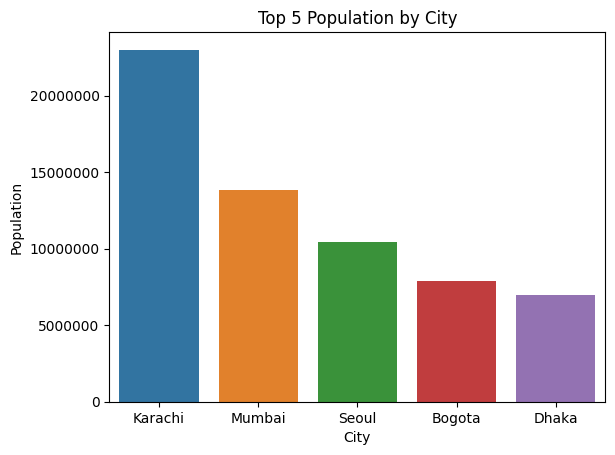

In [ ]:
Top5PopulationByCitybargraph = sns.barplot(x='City', y='Population', data=df.sort_values(by='Population', ascending=False).nlargest(5, 'Population'))
Top5PopulationByCitybargraph.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
plt.title('Top 5 Population by City')

In [ ]:
top_5_cities_by_population = df.sort_values(by='Population', ascending=False).nlargest(5, 'Population')
top_5_cities_by_population.loc[:, ['City', 'Population']]

,City,Population
13,Karachi,23000000
20,Mumbai,13830884
46,Seoul,10464051
30,Bogota,7862677
34,Dhaka,7000940


Above are the top 5 most populous cities within the dataset.

It is worth noting that the dataset does not contain cities from Japan or China which is known to have a high population.

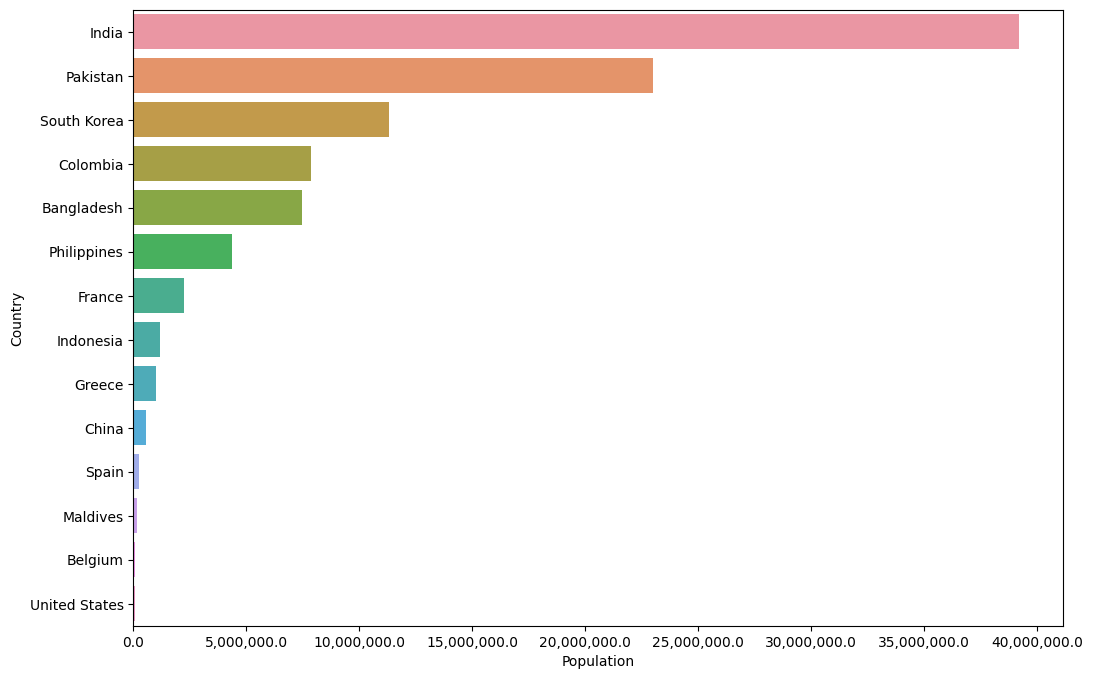

In [46]:
country_by_population = df.groupby('Country').Population.sum().sort_values(ascending=False).reset_index()
graph_country_by_population = sns.barplot(x='Population', y='Country', data=country_by_population, orient='h')
graph_country_by_population.xaxis.set_major_formatter('{:,}'.format)
graph_country_by_population.figure.set_size_inches(12, 8)

In [50]:
US_rows = df[df["Country"] == "United States"]
print (US_rows)

          City  Population  Area (km²)  Density (/km²)        Country
37  Union City       62715        3.29           19066  United States


In [51]:
CN_rows = df[df["Country"] == "China"]
print (CN_rows)

     City  Population  Area (km²)  Density (/km²) Country
40  Macau      542200        29.2           18568   China


Within the dataset, it seems like India has the highest population among the countries. It is worth nothing that the dataset only included 1 city from the United States and China which may cause inaccuracy if we are trying to determine which country has the highest population.

In [59]:
df['area_to_density_ratio'] = df['Area (km²)'] / df['Density (/km²)']*100

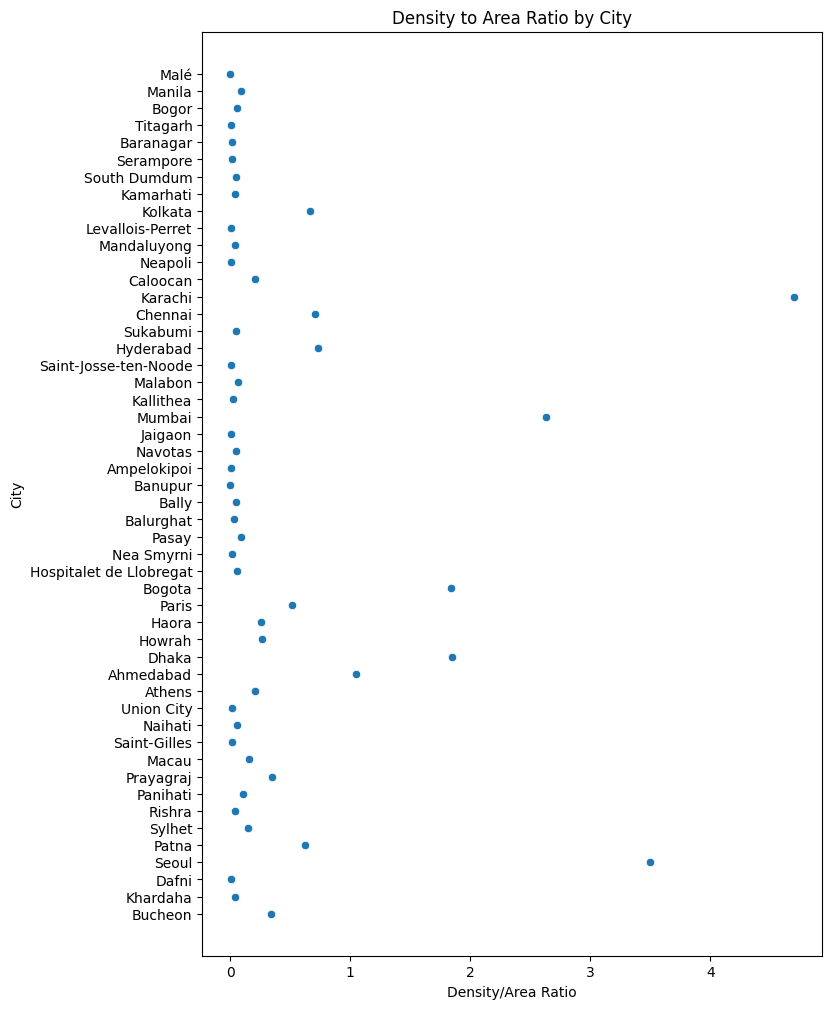

In [68]:
area_density_plot = sns.scatterplot(x='area_to_density_ratio', y='City', data=df)
plt.xlabel('Density/Area Ratio')
plt.ylabel('City')
plt.title('Density to Area Ratio by City')
area_density_plot.figure.set_size_inches(8, 12)

In [75]:
top_5_cities_by_areadensity = df.sort_values(by='area_to_density_ratio', ascending=False).nlargest(5, 'area_to_density_ratio')
top_5_cities_by_areadensity.loc[:, ['City', 'area_to_density_ratio', 'Area (km²)', 'Density (/km²)' ]]

,City,area_to_density_ratio,Area (km²),Density (/km²)
13,Karachi,4.695754,1200.00,25555
46,Seoul,3.500983,605.25,17288
20,Mumbai,2.628940,603.00,22937
34,Dhaka,1.851185,360.00,19447
30,Bogota,1.836064,379.90,20691


Area to Density ratio represents how many km² of land area per person living in each city. 

##Questions
- What are the top 5 most populous cities within the dataset?
- Which country has the highest population?
- Which cities has the highest density to area ratio?

##Conclusions
- There is a significant lack of data from certain countries such as United States, Japan and China. Further data is required as incomplete data can lead inaccuracy and biases.


- The 5 most populated Cities are Karachi, Mumbai, Seoul, Bogota and Dhaka within the dataset. This corresponds with the 5 most populous countries within the datset as well. We can hypothesize that only data from these 5 countries are complete.


- It is worth noting that while Mumbai has a higher density than Seoul and Seoul has a higher city wise area, Seoul has a higher area to density ratio than Mumbai suggesting that Seoul has more km² of land area per person living. This could have implications, such as differences in living conditions and infrastructure. More investigation may be required!